#**Tổng hợp các cách download dữ liệu chứng khoán Việt Nam bằng python**

Bài viết này tổng hợp các cách sử dụng python để download dữ liệu chứng khoán Việt Nam. Có 2 phương pháp mà tổng hợp được, cùng với một số lưu ý về ưu nhược điểm của từng cách.

1.   Download từ Vndirect, dùng code clone từ github Vnquant của Phạm Đình Khánh.
2. Download từ Vnstock của Vũ Thịnh


#**Phương pháp 1: Download từ API của Vndirect**
Sử dụng code của Phạm Đình Khánh: vnquant (https://github.com/phamdinhkhanh/vnquant)

**Ưu điểm**

- Hỗ trợ download dữ liệu về báo cáo tài chính và các chỉ số cơ bản của doanh nghiệp

- Dữ liệu VNINDEX có cột volume đã điều chỉnh (chính xác nhất)

- Thích hợp cho việc phân tích kỹ thuật với các tính năng như biểu đồ nến, các chỉ báo kỹ thuật...

**Nhược điểm**

Phụ thuộc vào cơ sở dữ liệu và API của Vndirect, nếu có thay đổi hoặc gián đoạn dịch vụ có thể ảnh hưởng đến việc tải dữ liệu.


In [ ]:
!pip install httpx

In [ ]:
!git clone https://github.com/phamdinhkhanh/vnquant.git

In [ ]:
%cd vnquant

In [ ]:
!pip install git+https://github.com/phamdinhkhanh/vnquant.git

In [ ]:
!pip install vnquant

In [ ]:
%cd ..
!rm -rf vnquant
!ls

In [ ]:
# !pip freeze | grep vnquant

In [ ]:
# import vnquant
# vnquant.__version__

**Tải bộ dữ liệu giá**

In [28]:
import vnquant.data as dt

loader = dt.DataLoader(symbols="TCB",
           start="2022-01-01",
           end="2022-10-01",
           minimal=True,
           data_source="VND")

data = loader.download()
data.head()

Attributes,high,low,open,close,avg,volume
Symbols,TCB,TCB,TCB,TCB,TCB,TCB
date,,,,,,
2022-01-04,51.2,50.30,50.5,50.90,50.96,12054600.0
2022-01-05,51.2,50.30,50.9,50.50,50.79,11182100.0
2022-01-06,50.4,49.60,50.2,49.90,49.99,11308000.0
2022-01-07,50.1,49.40,49.9,49.45,49.60,8125200.0
2022-01-10,49.6,48.65,49.5,48.65,49.15,10828900.0


In [29]:
import vnquant.data as dt

loader = dt.DataLoader(symbols=["TCB", "VCB"],
           start="2022-01-01",
           end="2022-10-01",
           minimal=True,
           data_source="VND")

data = loader.download()
data.head()

Attributes  high          low        open        close          avg         \
Symbols      TCB   VCB    TCB   VCB   TCB   VCB    TCB   VCB    TCB    VCB   
date                                                                         
2022-01-04  51.2  79.4  50.30  78.0  50.5  79.0  50.90  79.0  50.96  78.86   
2022-01-05  51.2  80.4  50.30  78.0  50.9  79.0  50.50  78.0  50.79  78.88   
2022-01-06  50.4  79.9  49.60  77.9  50.2  78.6  49.90  79.1  49.99  78.88   
2022-01-07  50.1  79.9  49.40  78.2  49.9  79.6  49.45  79.8  49.60  79.09   
2022-01-10  49.6  79.9  48.65  78.5  49.5  79.7  48.65  79.5  49.15  79.14   

Attributes      volume             
Symbols            TCB        VCB  
date                               
2022-01-04  12054600.0  1133800.0  
2022-01-05  11182100.0  1603100.0  
2022-01-06  11308000.0  1215600.0  
2022-01-07   8125200.0   966200.0  
2022-01-10  10828900.0  1097000.0

**Tải bộ dữ liệu**

In [32]:
import vnquant.data as dt
loader = dt.FinanceLoader('TCB', '2018-06-02','2022-10-30', minimal=True)
data_basic = loader.get_basic_index()
data_basic.head()

,2022-12,2021-12,2020-12,2019-12,2018-12
index,,,,,
Tăng trưởng Doanh thu thuần 4 quý liền kề so với cùng kỳ năm trước,0.134507,0.423834,0.315150,0.251793,0.275410
ROAE,0.193967,0.215403,0.181615,0.177983,0.198433
ROAA,0.031702,0.035859,0.030622,0.028639,0.028673
Tăng trưởng Vốn chủ sở hữu so với đầu năm,0.219080,0.246958,0.202053,0.198716,0.922810


In [84]:
from vnquant import plot as pl
pl.vnquant_candle_stick(data='TCB',
                        title='TCB symbol from 2022-01-01 to 2022-10-01',
                        xlab='Date', ylab='Price',
                        start_date='2022-01-01',
                        end_date='2022-10-01',
                        show_advanced=['volume', 'macd', 'rsi'])

**Lấy dữ liệu theo ngành**

In [42]:
from vnquant import utils
meta = utils.get_ind_class(code_list=["HPG"])

BASE_URL:  https://finfo-api.vndirect.com.vn/v4/industry_classification
payload_str:  q=codeList:HPG~industryCode:~industryLevel:~higherLevelCode:~englishName:~vietnameseName:&size=9999
header:  {'content-type': 'application/json', 'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/100.0.4896.127 Safari/537.36'}


**Tham số:**

**code_list:** danh sách các chuỗi - mã chứng khoán

**industry_codes:** danh sách các chuỗi - mã ngành

**industry_levels:** danh sách các chuỗi - cấp độ ngành

**higher_level_codes:** danh sách các chuỗi - mã cấp cao hơn của ngành

**english_name:** chuỗi - phần tên tiếng Anh của ngành để truy vấn

**vietnamese_name:** chuỗi - phần tên tiếng Việt của ngành để truy vấn

**result_size:** số nguyên - số lượng ngành được bao gồm trên 1 trang kết quả

In [ ]:
meta['data']

In [44]:
import random
# randomly get 5 symbols in `Banks` sector:
codeList = meta['data'][1]['codeList'].split(',')
random.shuffle(codeList)
# codeList5 = codeList[:5]
codeList5 = ['BCA','DPS','MEL','HSV','TLH']
codeList5

['BCA', 'DPS', 'MEL', 'HSV', 'TLH']

import vnquant.data as dt

loader = dt.DataLoader(symbols=codeList5,
           start="2022-01-01",
           end="2022-10-01",
           minimal=True,
           data_source="vnd")

data = loader.download()
data.head()

<Axes: xlabel='date'>

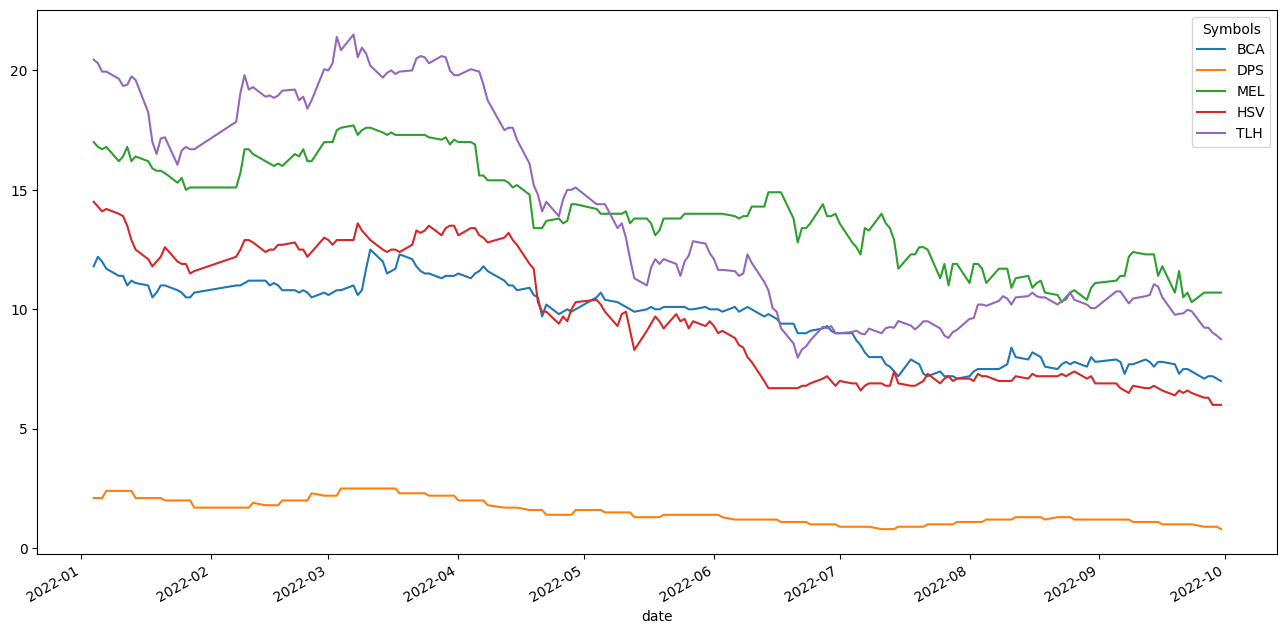

In [46]:
data['close'].plot(figsize = (16, 8))

#**Phương pháp 2: Download dữ liệu từ vnstock của Vũ Thịnh**

In [ ]:
!pip install -U vnstock

In [61]:
from vnstock import * #import all functions

In [68]:
stock_historical_data(symbol="TCB", start_date="2021-01-01", end_date="2023-09-18", resolution="1D", type="stock", beautify=True, decor=False, source='DNSE')

,time,open,high,low,close,volume,ticker
0,2021-01-04,32000,33400,31900,33000,18607800,TCB
1,2021-01-05,32750,33350,32549,33050,14280100,TCB
2,2021-01-06,33200,34100,32950,33200,20222300,TCB
3,2021-01-07,33750,34600,33400,34600,16387200,TCB
4,2021-01-08,35000,36250,34900,35700,16947900,TCB
...,...,...,...,...,...,...,...
670,2023-09-12,34550,35300,34400,35300,4935900,TCB
671,2023-09-13,35400,35450,34850,35000,4978100,TCB
672,2023-09-14,35100,35750,34900,34900,7642600,TCB
673,2023-09-15,35100,35500,34900,34900,4523900,TCB


In [67]:
stock_historical_data("VNINDEX", "2000-06-01", "2023-12-29", "1D", "index", source='TCBS')

Time range is 8611 days. Looping through 24 requests


,time,open,high,low,close,volume,ticker
0,2000-07-28,100.00,100.00,100.00,100.00,4200,VNINDEX
1,2000-07-28,100.00,100.00,100.00,100.00,4200,VNINDEX
2,2000-07-31,101.55,101.55,101.55,101.55,10300,VNINDEX
3,2000-08-02,103.38,103.38,103.38,103.38,300,VNINDEX
4,2000-08-04,105.20,105.20,105.20,105.20,3700,VNINDEX
...,...,...,...,...,...,...,...
5693,2023-12-25,1104.46,1118.31,1104.27,1117.66,658538434,VNINDEX
5694,2023-12-26,1118.30,1123.11,1117.93,1122.25,644741653,VNINDEX
5695,2023-12-27,1123.49,1126.47,1121.99,1121.99,776800261,VNINDEX
5696,2023-12-28,1122.77,1130.58,1120.50,1128.93,716927949,VNINDEX


**Dữ liệu giao dịch trong ngày**

In [74]:
stock_intraday_data(symbol='TCB', page_size=10, investor_segment=False)

,ticker,time,orderType,volume,price,prevPriceChange
0,TCB,14:29:59,Buy Up,500,40200.0,0.0
1,TCB,14:29:59,Buy Up,3200,40200.0,0.0
2,TCB,14:29:59,Buy Up,1800,40200.0,0.0
3,TCB,14:29:59,Buy Up,1000,40200.0,0.0
4,TCB,14:29:59,Buy Up,2200,40200.0,50.0
5,TCB,14:29:59,Buy Up,100,40150.0,0.0
6,TCB,14:29:59,Buy Up,1700,40150.0,0.0
7,TCB,14:29:58,Buy Up,8300,40150.0,0.0
8,TCB,14:29:58,Buy Up,1000,40150.0,0.0
9,TCB,14:29:58,Buy Up,200,40150.0,0.0


In [75]:
stock_intraday_data(symbol='TCB', page_size=10, investor_segment=True)

,ticker,time,orderType,investorType,volume,averagePrice,orderCount,prevPriceChange
0,TCB,14:30:00,Buy Up,WOLF,10500,40190.0,7,40.0
1,TCB,14:29:59,Buy Up,WOLF,10000,40150.0,5,0.0
2,TCB,14:29:56,Buy Up,WOLF,10000,40150.0,3,50.0
3,TCB,14:29:55,Sell Down,SHEEP,1000,40100.0,2,40.0
4,TCB,14:29:50,Sell Down,SHARK,50000,40060.0,10,10.0
5,TCB,14:29:40,Sell Down,SHEEP,3700,40050.0,1,-50.0
6,TCB,14:29:40,Buy Up,SHEEP,3300,40100.0,1,0.0
7,TCB,14:29:39,Buy Up,SHEEP,1700,40100.0,2,0.0
8,TCB,14:29:36,Buy Up,SHEEP,300,40100.0,1,0.0
9,TCB,14:29:35,Sell Down,SHEEP,3200,40100.0,6,0.0


**Vẽ đồ thị**

**Các tham số của hàm bao gồm:**

**df :** DataFrame chứa dữ liệu giá định dạng OHLC.

**ma_periods:** Các dải MA cần tính toán, nhập vào dưới dạng một danh sách. Ví dụ [10, 50, 200] sẽ cho phép tính MA10, MA50, MA200.

**show_volume: **True để hiển thị thông tin khối lượng giao dịch, False để ẩn.

**reference_period:** Số ngày để tính toán đường tham chiếu đỉnh/đáy của giá Ví dụ 90.

**figure_size:** Kích thước đồ thị, nhập dưới dạng tupple ví dụ (15, 8) thể hiện 1500 x 800px.

**title:** Tên của đồ thị.

**x_label:** Nhãn trục x (hoành)

**y_label:** Nhãn trục y (tung)

**colors:** Mã màu thể hiện cho khối lượng giao dịch trong những ngày giá cổ phiếu tăng/giảm, được nhập dưới dạng tupple. Ví dụ ('#00F4B0', '#FF3747').

**reference_color:** Cặp mã màu cho đường hỗ trợ (lowest low), kháng cự (highest high) được nhập vào dưới dạng tupple. Ví dụ ('black', 'blue')

In [81]:
from vnstock import * #import all functions

df = stock_historical_data(symbol='VNINDEX', start_date='2022-01-01', end_date='2023-10-10', resolution='1D', type='index')
fig = candlestick_chart(df,
                  title='VNINDEX Candlestick Chart with MA and Volume', x_label='Date', y_label='Price', ma_periods=[50,200],
                  show_volume=True, figure_size=(15, 8), reference_period=300,
                  colors=('lightgray', 'gray'), reference_colors=('black', 'blue'))
fig.show()

Hàm bollinger_bands cho phép tùy chỉnh các tham số tính toán giá trị để sử dụng trong biểu diễn dữ liệu, các tham số bao gồm:

**df:** DataFrame chứa dữ liệu giá định dạng OHLC, sử dụng hàm stock_historical_data.

**window:** Khung thời gian để tính toán giá trị trung bình động đơn giản (SMA), mặc định là 20 ngày.

**num_std_dev:** Số kỳ tính độ lệch chuẩn. Mặc định là 2.

***Hàm vẽ đồ thị Bollinger Bands bao gồm các tham số:***

**df:** DataFrame chứa dữ liệu Bollinger Bands ('time', 'open', 'high', 'low', 'close', 'volume', 'ticker', 'upper_band', 'middle_band', 'lower_band'). Dữ liệu này có được sau khi xử lý dữ liệu giá định dạng OHLC (hàm stock_historical_data) với hàm bollinger_bands.

**use_candlestick:** Chọn sử dụng đồ thị nến (giá trị True) hay chỉ biểu diễn giá đóng cửa dạng đồ thị đường (giá trị False). Mặc định dùng đồ thị nến.

**show_volume:** Chọn hiển thị thông tin khối lượng giao dịch (True) hoặc ẩn đi (False). Mặc định hiển thị.

**fig_size:** Tupple chứa giá trị kích thước đồ thị (width, height). Ví dụ (15, 8) thể hiện 1500 x 800px.

**chart_title:** Tên của đồ thị. Nếu không chỉ rõ, sẽ dùng tên mặc định
**xaxis_title:** Tên của trục x (hoành)

**yaxis_title:** Tên của trục y (tung)

**bollinger_band_colors:** Tupple chứa bộ mã màu cho dải Bollinger Bands (upper, middle, lower).

**volume_colors:** Tuple chứa mã màu cho thông tin khối lượng giao dịch trong những ngày giá tăng, giảm. Ví dụ ('green', 'red').

In [80]:
df = bollinger_bands(df, window=20, num_std_dev=2)
fig = bollinger_bands_chart(df, use_candlestick=True, show_volume=True,
                            fig_size=(15, 8), chart_title='Bollinger Bands Chart', xaxis_title='Date', yaxis_title='Price',
                            bollinger_band_colors=('gray', 'orange', 'gray'), volume_colors=('#00F4B0', '#FF3747'))
fig.show()

**Cuối cùng: Lưu dữ liệu dạng DataFrame về file Excel:**

In [ ]:
df.to_excel("output.xlsx", sheet_name='Sheet_name_1')